In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = 3
MOMENTUM = -0.03
CYCLE = 1000
STEPSIZE = -0.01

In [4]:
def objective(v: np.array) -> np.array:
    return(np.power(v, 2))

In [5]:
def derivative(v: np.array) -> np.array:
    return(np.dot(2, v))

In [6]:
def distance(v: np.array, w: np.array) -> float:
    v = np.subtract(v, w)
    return(np.power((np.dot(v, v)), 0.5))

In [27]:
def gradient_step(v: np.array, gradient: np.array, prev_step: np.array) -> np.array:
    #Движемся с шагом step_size в напрвлении градиента "gradient" от "v"
    assert len(v) == len(gradient)
    
    step = np.add(np.dot(STEPSIZE, gradient), np.dot(MOMENTUM, prev_step))
    return(step)


v = np.array([random.uniform(-10, 10) for i in range(X)]) #случайная отправная точка
results = objective(v)
print(v)
print(results)

[ 3.12096817 -7.05270878 -1.0972032 ]
[ 9.74044235 49.74070118  1.20385485]


In [28]:
res = np.empty((0, X), float)
scores = np.empty((0, X), float)
prev_step = np.zeros(X)

for epoch in range(CYCLE):
    grad = derivative(v) #вычисляем градиент в v
    step = gradient_step(v, grad, prev_step) #делаем отрицательный градиентный шаг с моментной модификацией, берем умереннный
    v = np.add(step, v)
    res = np.append(res, [v], axis=0)
    scores = np.append(scores, [step], axis=0)
    prev_step = step
    print(v)


[ 3.05854881 -6.91165461 -1.07525913]
[ 2.99925042 -6.77765314 -1.05441227]
[ 2.94104436 -6.64612012 -1.03394943]
[ 2.88396965 -6.51714371 -1.01388433]
[ 2.8280025  -6.39067013 -0.9942086 ]
[ 2.77312147 -6.26665093 -0.9749147 ]
[ 2.71930547 -6.14503849 -0.95599522]
[ 2.66653384 -6.02578609 -0.9374429 ]
[ 2.61478631 -5.90884794 -0.91925061]
[ 2.56404301 -5.79417913 -0.90141137]
[ 2.51428445 -5.68173561 -0.88391832]
[ 2.46549152 -5.5714742  -0.86676474]
[ 2.41764547 -5.46335256 -0.84994405]
[ 2.37072795 -5.35732916 -0.83344979]
[ 2.32472091 -5.25336328 -0.81727563]
[ 2.27960671 -5.15141499 -0.80141534]
[ 2.235368   -5.05144514 -0.78586284]
[ 2.1919878  -4.95341533 -0.77061216]
[ 2.14944945 -4.85728792 -0.75565744]
[ 2.10773661 -4.76302598 -0.74099293]
[ 2.06683326 -4.67059332 -0.726613  ]
[ 2.0267237  -4.57995444 -0.71251214]
[ 1.98739251 -4.49107451 -0.69868493]
[ 1.9488246  -4.40391942 -0.68512604]
[ 1.91100514 -4.31845569 -0.67183029]
[ 1.87391962 -4.23465048 -0.65879256]
[ 1.8375538 

In [59]:
print(distance(v, np.zeros(X)) < 0.001)

True


In [60]:
print(distance(v, np.zeros(X))) #минимум функции sum_of_squares находится в нуле, v-min получился 2.30 * 10^(-8) ≈ 0 (0.00000000238...)

2.0848262172134687e-08


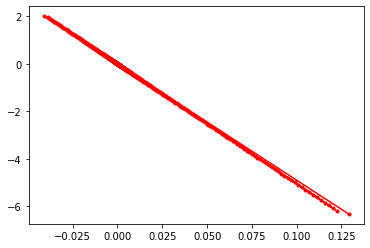

In [61]:
# plot the solutions found
for i in range(CYCLE):
    plt.plot(scores[i], res[i], '.-', color='red')
# show the plot
plt.show()